In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
np.set_printoptions(linewidth=100)

In [3]:
train = pd.read_csv(r'C:\Users\Максим\Desktop\Аналитика данных\Datasets\titanic\train.csv')
test = pd.read_csv(r'C:\Users\Максим\Desktop\Аналитика данных\Datasets\titanic\test.csv')
submission = pd.read_csv(r'C:\Users\Максим\Desktop\Аналитика данных\Datasets\titanic\gender_submission.csv')

In [4]:
cols = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
train.shape, test.shape

((891, 12), (418, 11))

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


PassengerId — идентификатор пассажира <br>
Survival — поле в котором указано спасся человек (1) или нет (0) <br>
Pclass — содержит социально-экономический статус: <br>
   высокий <br>
   средний <br>
   низкий <br>
Name — имя пассажира <br>
Sex — пол пассажира <br>
Age — возраст <br>
SibSp — содержит информацию о количестве родственников 2-го порядка (муж, жена, братья, сетры) <br>
Parch — содержит информацию о количестве родственников на борту 1-го порядка (мать, отец, дети) <br>
Ticket — номер билета <br>
Fare — цена билета <br>
Cabin — каюта <br>
Embarked — порт посадки <br>
   C — Cherbourg <br>
   Q — Queenstown <br>
   S — Southampton


In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
round(100*train['Survived'].value_counts(normalize=True), 2)

0    61.62
1    38.38
Name: Survived, dtype: float64

Классы хоть и не совсем сбалансированы, но это не критично.

# Предобработка

## Замена пропущенных значений

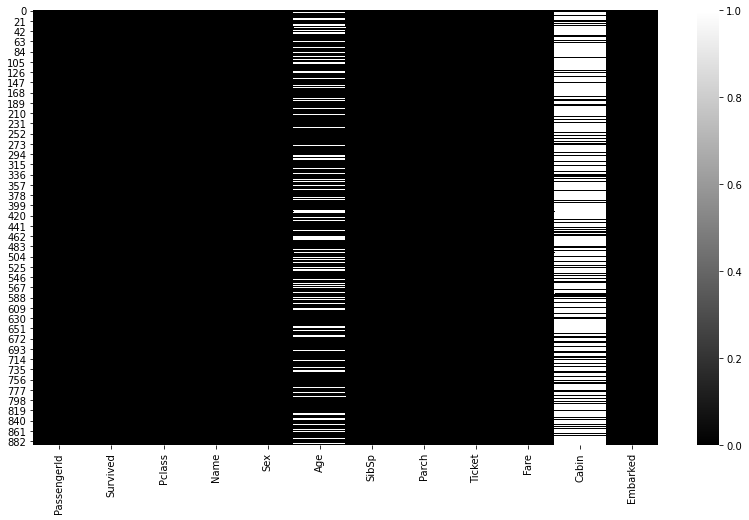

In [13]:
# Визуализируем пропущенные значения

plt.figure(figsize=(14, 8))
sns.heatmap(train.isnull(), cmap='binary_r');

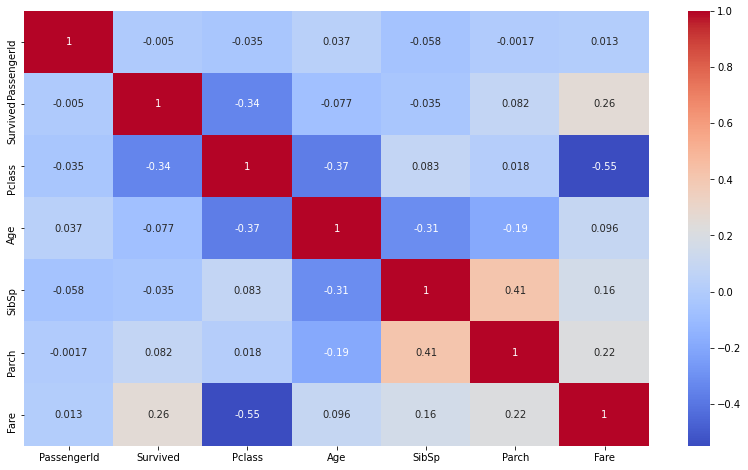

In [14]:
# Корреляции

plt.figure(figsize=(14, 8))
sns.heatmap(train.corr(),
                annot=True, 
                cmap = "coolwarm");

## Предобработка средствами Sklearn

In [15]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.pipeline import FeatureUnion

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV, cross_val_score, RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [16]:
X_train = train.drop(columns='Survived')
y_train = train['Survived']
X_test = test
y_test = submission['Survived']

In [17]:
X_train.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
numeric_features = ['Age', 'Fare'] 
categorical_features = ['Sex', 'Embarked', 'Pclass']
name_feature = ['Name']
family_features = ['SibSp', 'Parch']

In [20]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
simp = SimpleImputer(strategy='most_frequent')
kimp = KNNImputer()
scaler = StandardScaler()

### Numeric and Categorical Transformer

In [21]:
num_pipe = Pipeline([
    ('imputer', kimp),
    ('scaler', scaler)
])

cat_pipe = Pipeline([
    ('imputer', simp),
    ('onehot', ohe)
])

### Custom Transformers

In [22]:
class TitleExtractor(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
        
    def fit(self, X, y=None):
        return self   
    
    def transform(self, X):
        Title_Dictionary = {
                "Capt": "Officer", "Col": "Officer", "Major": "Officer","Jonkheer": "Royalty",
                "Don": "Royalty","Sir" : "Royalty","Dr": "Officer","Rev": "Officer","the Countess":"Royalty",
                "Mme": "Mrs", "Mlle": "Miss", "Ms": "Mrs", "Mr" : "Mr", "Mrs" : "Mrs", "Miss" : "Miss",
                "Master" : "Master", "Lady" : "Royalty"}
        
        X['Title'] = X['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).map(Title_Dictionary)
        X.drop('Name', axis=1, inplace=True)
        
#         titles_dummies = pd.get_dummies(X['Title'], prefix='Title')
#         X = pd.concat([X, titles_dummies], axis=1)
        
        titles = ohe.fit_transform(X[['Title']])
    
        X.drop('Title', axis=1, inplace=True)
        
        return X.values

In [23]:
class FamilySizeCounter(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
        
    def fit(self, X, y=None):
        return self     
    
    def transform(self, X, y=None):
        X['family_size'] = X['SibSp'] + X['Parch'] + 1
        X.drop(['SibSp', 'Parch'], axis=1, inplace=True)
        
        return X.values

### Full Pipeline

In [24]:
transformer = ColumnTransformer([
    ('num_preprocessing', num_pipe, numeric_features),
    ('cat_preprocessing', cat_pipe, categorical_features),
    ('name_preprocessing', TitleExtractor(), name_feature),
    ('family_size', FamilySizeCounter(), family_features)
])

In [25]:
new_X = X_train.copy()
new_y = y_train.copy()
new_test = X_test.copy()

In [26]:
transformer.fit(new_X, new_y)
pd.DataFrame(transformer.transform(new_X))

,0,1,2,3,4,5,6,7,8,9,10
0,-0.572142,-0.502445,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0
1,0.626331,0.786845,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0
2,-0.272524,-0.488854,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.401618,0.420730,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0
4,0.401618,-0.486337,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,-0.197619,-0.386671,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
887,-0.796856,-0.044381,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
888,-0.122715,-0.176263,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0
889,-0.272524,-0.044381,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


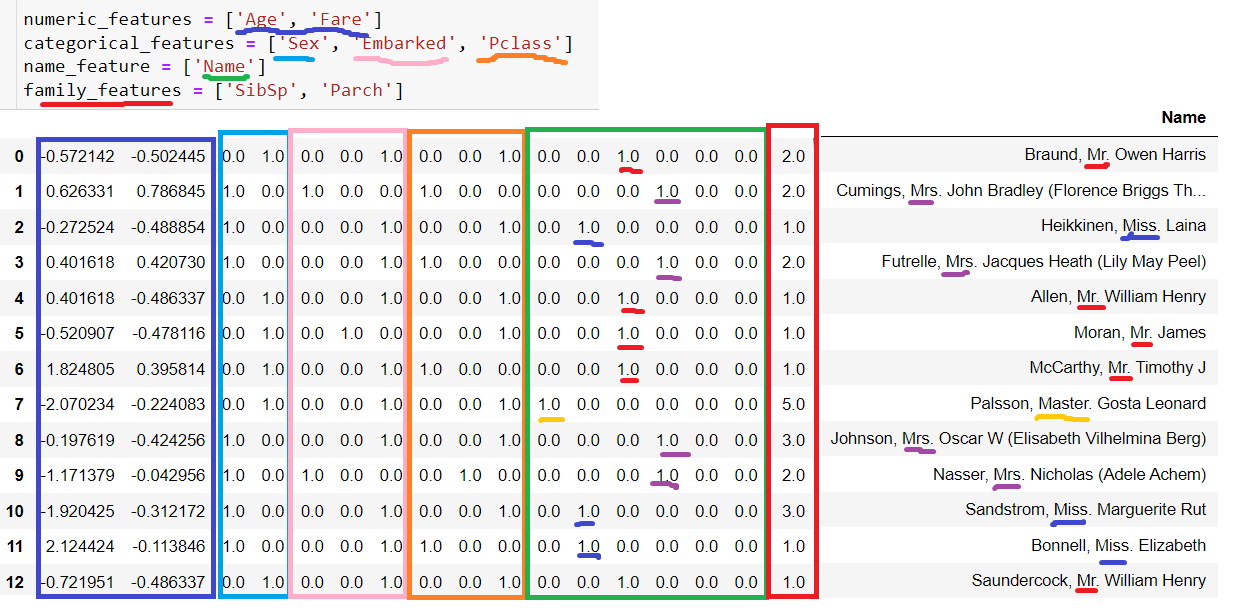

# Модель

## Строим пайплайн

In [27]:
model = Pipeline([
    ('transformer', transformer),
    ('clf', RandomForestClassifier(random_state=42))
])

In [28]:
model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num_preprocessing',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat_preprocessing',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                               

In [29]:
y_pred = model.predict(X_test)

In [30]:
accuracy_score(y_test, y_pred)

0.8444976076555024

In [31]:
# Кросс-валидация всего пайплайна показывает более достоверные scores

cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()

0.8215617349821104

In [32]:
from sklearn import set_config
set_config(display='diagram')

In [33]:
model

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num_preprocessing',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat_preprocessing',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Sex', 'Embarked',
                                                   'Pclass']),
                                                 ('name_preprocessing',
                                                  TitleExtractor(), ['Name']),
                                                 ('family_size',
                                                  FamilySizeCounter(),
                                                  ['SibSp', 'Parch'])])),
                ('clf', RandomForestClassifier(random_state=42))])

## Подбираем лучшие параметры пайплайна

In [34]:
classifiers = {
    "LogisiticRegression": LogisticRegression(random_state=42),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(random_state=42),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    'RandomForest Classifier': RandomForestClassifier(random_state=42)
}

In [35]:
# params = {}
# params['preprocessor__num__knn_imputer__n_neighbors'] = range(2, 12, 2)
# params['preprocessor__num__knn_imputer__weights'] = ['uniform', 'distance']
# params['classifier'] = list(classifiers.values())

In [36]:
# model.get_params().keys() позволяет увидеть доступные параметры для тюнинга

In [37]:
# model.get_params().keys()

In [38]:
params = {}
params['clf'] = list(classifiers.values())

In [39]:
grid = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train);

In [40]:
grid.best_score_

0.8260372857949909

In [41]:
grid.best_params_

{'clf': SVC(random_state=42)}

In [42]:
best_classifiers = pd.DataFrame(grid.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]\
        .sort_values(by='rank_test_score').set_index('rank_test_score')
best_classifiers['params'] = best_classifiers['params'].apply(lambda s: re.search(': (.+?)\(', str(s)).group(1))

In [43]:
best_classifiers = best_classifiers.groupby('params').max().sort_values(by='mean_test_score', ascending=False)
best_classifiers

,mean_test_score
params,
SVC,0.826037
RandomForestClassifier,0.821562
LogisticRegression,0.794646
KNeighborsClassifier,0.793535
DecisionTreeClassifier,0.782299


In [44]:
best_classifiers.index

Index(['SVC', 'RandomForestClassifier', 'LogisticRegression',
       'KNeighborsClassifier', 'DecisionTreeClassifier'],
      dtype='object', name='params')

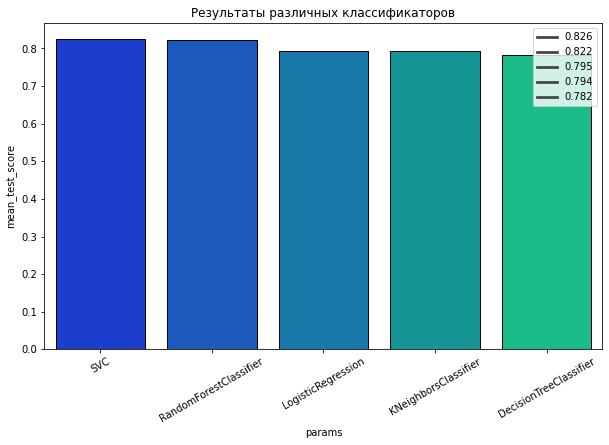

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(data=best_classifiers, x=best_classifiers.index, y='mean_test_score', ec='k', palette='winter')
plt.xticks(rotation=30)
plt.title('Результаты различных классификаторов')
plt.legend(labels=(round(best_classifiers['mean_test_score'], 3)));

**SVC** показывает лучшие результаты, **RandomForestClassifier** стоит на 2 месте. Имеет смысл подобрать именно для них лучшие параметры.

### Лучшие параметры SVC

In [49]:
svc_clf = Pipeline(steps=[('preprocessor', transformer),
                      ('classifier', SVC(random_state=42))])

In [50]:
# list(svc_clf.get_params().keys())

In [51]:
svc_params = {}
svc_params['classifier__kernel'] = ['linear', 'rbf', 'poly']
svc_params['classifier__gamma'] = [0.01, 0.1, 1, 10]
svc_params['classifier__C'] = [0.01, 0.1, 1, 10]

In [52]:
import time

In [53]:
t0 = time.time()
svc_search = RandomizedSearchCV(svc_clf, svc_params, cv=5, scoring='accuracy')
svc_search.fit(X_train, y_train);
t1 = time.time()
print(t1-t0)

6.020278215408325


In [54]:
svc_search.best_score_

0.8260372857949909

In [55]:
svc_search.best_params_

{'classifier__kernel': 'rbf', 'classifier__gamma': 0.1, 'classifier__C': 1}

### Лучшие параметры RandomForest

In [56]:
rf_clf = Pipeline(steps=[('preprocessor', transformer),
                      ('classifier', RandomForestClassifier(random_state=42))])

In [57]:
# list(rf_clf.get_params().keys())

In [58]:
rf_params = {}
rf_params['classifier__n_estimators'] = range(10, 110, 10)
rf_params['classifier__max_depth'] = range(1, 20)
rf_params['classifier__min_samples_split'] = range(1, 20)

In [59]:
t0 = time.time()
rf_search = RandomizedSearchCV(rf_clf, rf_params, cv=5, scoring='accuracy')
rf_search.fit(X_train, y_train);
t1 = time.time()
print(t1-t0)

11.58828067779541


In [60]:
rf_search.best_score_

0.8350386039796623

In [64]:
good_rf_params = rf_search.best_params_
good_rf_params

{'classifier__n_estimators': 50,
 'classifier__min_samples_split': 7,
 'classifier__max_depth': 8}

При данных параметрах точность случайного леса становится даже выше, чем у SVC. Показатель score составляет 0.835